
### Problem Statement
As a data scientist who is working for home electronics company which manufactures smart televisions.The goal is to make the feature in the smart-TV to recognise five different gestures made by the user to control the TV without using a remote.

The Five Gestures are:

1. **Thumbs Up : Increase the volume**
2. **Thumb down: Decrease the volume**
3. **Left swipe: Jump 10 seconds Backwards**
4. **Right swipe: Jump 10 seconds Forwards**
3. **Stop: Pause the movie**

In [1]:
# Importing libraries
import numpy as np

import os
#from scipy.misc.pilutil import imread
#from scipy.misc.pilutil import imresize
#from scipy.misc import imread, imresize
from keras import backend as K
import tensorflow as tf
import datetime
import os
import warnings
warnings.filterwarnings("ignore")
import abc
from sys import getsizeof


# Importing CV2, pandas, numpy and Matplotlib.pyplot
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#% matplotlib inline

In [11]:
#mount colab zip file
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [13]:
#Extracting the Data
#unzip the dataset
!unzip "/content/drive/MyDrive/Project_data.zip" > /dev/null

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#Installing pillow package
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Importing imread from imageio to read the image 
from imageio import imread
# Importing resize from skimage.transform to resize the image
from skimage.transform import resize

The random seed has been set so that the results don't vary drastically.

In [16]:
# Code for setting the random seed
import random as rn
rn.seed(30)



In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [17]:
# importing some other libraries which will be needed for model building using Keras.

from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
#from keras.layers.recurrent import LSTM
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import optimizers
from keras.layers import Dropout

In [18]:
#Saving the path of the Project_data in the variable 'Project_folder
project_folder='/content/Project_data'

In [19]:
# Reading the train.csv and the val.csv
data = pd.read_csv(r'/content/Project_data/train.csv',header=None,sep=';')
print(data.head())
print(set(data[2]))
unique_items = set(data[2])
print(unique_items)
#0, 1, 2, 3, 4
print(len(data[data[2] == 0]))
print(len(data[data[2] == 1]))
print(len(data[data[2] == 2]))
print(len(data[data[2] == 3]))
print(len(data[data[2] == 4]))

data = pd.read_csv(r'/content/Project_data/val.csv',header=None,sep=';')
print(data.head())
print(set(data[2]))
unique_items = set(data[2])
print(unique_items)
#0, 1, 2, 3, 4
print(len(data[data[2] == 0]))
print(len(data[data[2] == 1]))
print(len(data[data[2] == 2]))
print(len(data[data[2] == 3]))
print(len(data[data[2] == 4]))




                                          0               1  2
0  WIN_20180925_17_08_43_Pro_Left_Swipe_new  Left_Swipe_new  0
1  WIN_20180925_17_18_28_Pro_Left_Swipe_new  Left_Swipe_new  0
2  WIN_20180925_17_18_56_Pro_Left_Swipe_new  Left_Swipe_new  0
3  WIN_20180925_17_19_51_Pro_Left_Swipe_new  Left_Swipe_new  0
4  WIN_20180925_17_20_14_Pro_Left_Swipe_new  Left_Swipe_new  0
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}
136
137
130
137
123
                                          0               1  2
0  WIN_20180925_17_17_04_Pro_Left_Swipe_new  Left_Swipe_new  0
1  WIN_20180925_17_43_01_Pro_Left_Swipe_new  Left_Swipe_new  0
2  WIN_20180925_18_01_40_Pro_Left_Swipe_new  Left_Swipe_new  0
3  WIN_20180925_18_03_21_Pro_Left_Swipe_new  Left_Swipe_new  0
4  WIN_20180926_16_46_22_Pro_Left_Swipe_new  Left_Swipe_new  0
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}
18
23
22
21
16


##### Plotting

In [20]:
#Building a plot function to plot the history of training/validation accuracies/losses.

def plot(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    axes[0].plot(history.history['loss'])   
    axes[0].plot(history.history['val_loss'])
    axes[0].legend(['loss','val_loss'])

    axes[1].plot(history.history['categorical_accuracy'])   
    axes[1].plot(history.history['val_categorical_accuracy'])
    axes[1].legend(['categorical_accuracy','val_categorical_accuracy'])

In [21]:
# To make the model robust,the order is shuffled in which examples are fed to the classifier, so that batches between epochs are not alike. 
print(np.random.permutation(10))


[5 7 3 9 6 4 8 0 1 2]


In [45]:
from tensorflow.keras.models import load_model
from keras.models import load_model
model.save('/content/gdrive/MyDrive/Saved_Models/final.hdf5')

model_init_2023-03-2114_02_10.345408

NameError: ignored

In [50]:
from google.colab import files
files.download("model_init_2023-03-2114_02_10.345408")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Video Frame Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [22]:

## Building a Generator
class ModelBuilder(metaclass= abc.ABCMeta):
    # def initialize_path initialises the path where project data is stored
    #paths
    def initialize_path(self,project_folder):
        #data paths
        self.train_doc = np.random.permutation(open(project_folder + '/' + 'train.csv').readlines())
        #data paths
        self.val_doc = np.random.permutation(open(project_folder + '/' + 'val.csv').readlines())
        #Directory of images
        self.train_path = project_folder + '/' + 'train'
        #Directory of images
        self.val_path =  project_folder + '/' + 'val'
        self.num_train_sequences = len(self.train_doc)
        self.num_val_sequences = len(self.val_doc)


    #Def initialize_image_properties initialises the image properties    
    #Data set creation properties
    def initialize_image_properties(self,image_height=100,image_width=100):
        self.image_height=image_height
        self.image_width=image_width
        #R,G,B
        self.channels=3
        #Unique Gestures
        self.num_classes=5
        #Frames to check for actions
        #Another options is check movements every 2 seconds
        #Frame every two seconds
        self.total_frames=30


    #def initialize_hyperparams initialises the batch size, frames to sample and the no. of epochs
    def initialize_hyperparams(self,frames_to_sample=30,batch_size=20,num_epochs=20):
        #configurable 30
        self.frames_to_sample=frames_to_sample
        #Default 20
        self.batch_size=batch_size
        #Default 20
        self.num_epochs=num_epochs
        

    #Def generator is The generator function        
    #batches of data
    def generator(self,source_path, folder_list, augment=False):
        img_idx = np.round(np.linspace(0,self.total_frames-1,self.frames_to_sample)).astype(int)
        batch_size=self.batch_size
        while True:
            t = np.random.permutation(folder_list)
            #Randomly permute a sequence, or return a permuted range.
            num_batches = len(t)//batch_size
        
            for batch in range(num_batches): 
                #within the folder batches of 30 files
                batch_data, batch_labels= self.one_batch_data(source_path,t,batch,batch_size,img_idx,augment)
                yield batch_data, batch_labels 

            remaining_seq=len(t)%batch_size
        
            if (remaining_seq != 0):
                batch_data, batch_labels= self.one_batch_data(source_path,t,num_batches,batch_size,img_idx,augment,remaining_seq)
                yield batch_data, batch_labels 
    
    # This method will create the batch of images with specific labels
    def one_batch_data(self,source_path,t,batch,batch_size,img_idx,augment,remaining_seq=0):

        seq_len = remaining_seq if remaining_seq else batch_size
    
        batch_data = np.zeros((seq_len,len(img_idx),self.image_height,self.image_width,self.channels)) 
        batch_labels = np.zeros((seq_len,self.num_classes)) 
    
        if (augment): batch_data_aug = np.zeros((seq_len,len(img_idx),self.image_height,self.image_width,self.channels))

        
        for folder in range(seq_len): 
            imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) 
            for idx,item in enumerate(img_idx):
                #performing image reading and resizing
                image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                image_resized=resize(image,(self.image_height,self.image_width,3))
            
                #normalizing the images
                #reduce computation time
                batch_data[folder,idx,:,:,0] = (image_resized[:,:,0])/255
                batch_data[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                batch_data[folder,idx,:,:,2] = (image_resized[:,:,2])/255
            
                if (augment):
                    shifted = cv2.warpAffine(image, 
                                             np.float32([[1, 0, np.random.randint(-30,30)],[0, 1, np.random.randint(-30,30)]]), 
                                            (image.shape[1], image.shape[0]))
                    
                    gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)

                    x0, y0 = np.argwhere(gray > 0).min(axis=0)
                    x1, y1 = np.argwhere(gray > 0).max(axis=0) 
                    # cropping the images to have the targeted gestures and remove the noise from the images.
                    cropped=shifted[x0:x1,y0:y1,:]
                    
                    image_resized=resize(cropped,(self.image_height,self.image_width,3))
                    
                    #shifted = cv2.warpAffine(image_resized, 
                    #                        np.float32([[1, 0, np.random.randint(-3,3)],[0, 1, np.random.randint(-3,3)]]), 
                    #                        (image_resized.shape[1], image_resized.shape[0]))
            
                    batch_data_aug[folder,idx,:,:,0] = (image_resized[:,:,0])/255
                    batch_data_aug[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                    batch_data_aug[folder,idx,:,:,2] = (image_resized[:,:,2])/255
                
            
            batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            
    
        if (augment):
            batch_data=np.concatenate([batch_data,batch_data_aug])
            batch_labels=np.concatenate([batch_labels,batch_labels])

        
        return(batch_data,batch_labels)
    
    
    def train_model(self, model, augment_data=False):
        train_generator = self.generator(self.train_path, self.train_doc,augment=augment_data)
        val_generator = self.generator(self.val_path, self.val_doc)

        model_name = 'model_init' + '_' + str(datetime.datetime.now()).replace(' ','').replace(':','_') + '/'
    
        if not os.path.exists(model_name):
            os.mkdir(model_name)
        
        filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
        LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=4)
        
        earlystop = EarlyStopping( monitor="val_loss", min_delta=0,patience=10,verbose=1)
        callbacks_list = [checkpoint, LR, earlystop]

        if (self.num_train_sequences%self.batch_size) == 0:
            steps_per_epoch = int(self.num_train_sequences/self.batch_size)
        else:
            steps_per_epoch = (self.num_train_sequences//self.batch_size) + 1

        if (self.num_val_sequences%self.batch_size) == 0:
            validation_steps = int(self.num_val_sequences/self.batch_size)
        else:
            validation_steps = (self.num_val_sequences//self.batch_size) + 1
    
        history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=self.num_epochs, verbose=1, 
                            callbacks=callbacks_list, validation_data=val_generator, 
                            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)
        return history

        
    @abc.abstractmethod
    def define_model(self):
        pass

## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

## Sample Model

In [16]:
from keras.optimizers import adam_v2
class ModelConv3D1(ModelBuilder):
    
    def define_model(self):

        model = Sequential()
        model.add(Conv3D(16, (3, 3, 3), padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, (2, 2, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, (2, 2, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(128, (2, 2, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes,activation='softmax'))

        #optimiser = optimizers.Adam()
        optimiser = adam_v2.Adam()
        #optimiser = 'sgd'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
conv_3d1=ModelConv3D1()
conv_3d1.initialize_path(project_folder)
conv_3d1.initialize_image_properties(image_height=160,image_width=160)
conv_3d1.initialize_hyperparams(frames_to_sample=30,batch_size=10,num_epochs=1)
conv_3d1_model=conv_3d1.define_model()
conv_3d1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 160, 160, 16)  1312      
                                                                 
 activation (Activation)     (None, 30, 160, 160, 16)  0         
                                                                 
 batch_normalization (BatchN  (None, 30, 160, 160, 16)  64       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 80, 80, 16)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 15, 80, 80, 32)    4128      
                                                                 
 activation_1 (Activation)   (None, 15, 80, 80, 32)    0

##### Sample Cropping

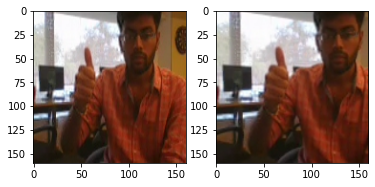

In [ ]:
test_generator=ModelConv3D1()
test_generator.initialize_path(project_folder)
test_generator.initialize_image_properties(image_height=160,image_width=160)
test_generator.initialize_hyperparams(frames_to_sample=30,batch_size=3,num_epochs=1)

g=test_generator.generator(test_generator.val_path,test_generator.val_doc,augment=True)
batch_data, batch_labels=next(g)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(batch_data[0,15,:,:,:])   
axes[1].imshow(batch_data[3,15,:,:,:])   

## Experimenting with Image resolution, number of frames to use and batch_size

In [ ]:
#conv_3d1.train_model(conv_3d1_model)

#### The limit on memory resources occurred with image resolution of 160x160 with 30 frames and batch_size of 40. 
#### The error message is given below:

ResourceExhaustedError: OOM when allocating tensor with shape[40,16,30,160,160] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc

In [ ]:
print("Memory util is {} Gigs". format(getsizeof(np.zeros((40,16,30,160,160)))/(1024*1024*1024)))

Memory util is 3.662109538912773 Gigs


##### Hence conducting some experiments to find a fair trade-off between these parameters in order to produce a robust model.

##### The experiments are conducted below how training time is affected by image resolution of 120, number of images in sequence (30 and 16) and batch size (20 and 10).

In [ ]:
#Experiment 1:
#image size = 120 * 120 , batch size = 20, frame_to_sample =30 and epochs = 10
conv_3d1=ModelConv3D1()
conv_3d1.initialize_path(project_folder)
conv_3d1.initialize_image_properties(image_height=120,image_width=120)
conv_3d1.initialize_hyperparams(frames_to_sample=30,batch_size=20,num_epochs=10)
conv_3d1_model=conv_3d1.define_model()
print("Total Params:", conv_3d1_model.count_params())
conv_3d1.train_model(conv_3d1_model)

Total Params: 3304901
Epoch 1/10
34/34 [==============================] - ETA: 0s - loss: 1.4576 - categorical_accuracy: 0.5370
Epoch 1: val_loss improved from inf to 7.04361, saving model to model_init_2023-03-2008_49_59.669076/model-00001-1.45758-0.53695-7.04361-0.21000.h5
34/34 [==============================] - 200s 6s/step - loss: 1.4576 - categorical_accuracy: 0.5370 - val_loss: 7.0436 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/10
34/34 [==============================] - ETA: 0s - loss: 0.6662 - categorical_accuracy: 0.7451
Epoch 2: val_loss did not improve from 7.04361
34/34 [==============================] - 194s 6s/step - loss: 0.6662 - categorical_accuracy: 0.7451 - val_loss: 11.1887 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 3/10
34/34 [==============================] - ETA: 0s - loss: 0.4587 - categorical_accuracy: 0.8341
Epoch 3: val_loss did not improve from 7.04361
34/34 [==============================] - 218s 7s/step - loss: 0.4587 - categorical_

In [ ]:
#Experiment 2:
#image size = 120 * 120 , batch size = 10, frame_to_sample = 16 and epochs = 10
conv_3d1=ModelConv3D1()
conv_3d1.initialize_path(project_folder)
conv_3d1.initialize_image_properties(image_height=120,image_width=120)
conv_3d1.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=10)
conv_3d1_model=conv_3d1.define_model()
print("Total Params:", conv_3d1_model.count_params())
conv_3d1.train_model(conv_3d1_model)

Total Params: 3304901
Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 1.5600 - categorical_accuracy: 0.4827
Epoch 1: val_loss improved from inf to 13.67498, saving model to model_init_2023-03-2009_28_39.068202/model-00001-1.55996-0.48265-13.67498-0.16000.h5
67/67 [==============================] - 120s 2s/step - loss: 1.5600 - categorical_accuracy: 0.4827 - val_loss: 13.6750 - val_categorical_accuracy: 0.1600 - lr: 0.0010
Epoch 2/10
67/67 [==============================] - ETA: 0s - loss: 0.8909 - categorical_accuracy: 0.6591
Epoch 2: val_loss did not improve from 13.67498
67/67 [==============================] - 150s 2s/step - loss: 0.8909 - categorical_accuracy: 0.6591 - val_loss: 22.7330 - val_categorical_accuracy: 0.1700 - lr: 0.0010
Epoch 3/10
67/67 [==============================] - ETA: 0s - loss: 0.7737 - categorical_accuracy: 0.7345
Epoch 3: val_loss did not improve from 13.67498
67/67 [==============================] - 164s 2s/step - loss: 0.7737 - categor

In [ ]:
#Experiment 3:
#image size = 120 * 120 , batch size = 20, frame_to_sample = 16 and epochs = 10
conv_3d1=ModelConv3D1()
conv_3d1.initialize_path(project_folder)
conv_3d1.initialize_image_properties(image_height=120,image_width=120)
conv_3d1.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=10)
conv_3d1_model=conv_3d1.define_model()
print("Total Params:", conv_3d1_model.count_params())
conv_3d1.train_model(conv_3d1_model)

Total Params: 3304901
Epoch 1/10
67/67 [==============================] - ETA: 0s - loss: 1.5779 - categorical_accuracy: 0.5143
Epoch 1: val_loss improved from inf to 8.39229, saving model to model_init_2023-03-2011_55_54.553380/model-00001-1.57791-0.51433-8.39229-0.19000.h5
67/67 [==============================] - 119s 2s/step - loss: 1.5779 - categorical_accuracy: 0.5143 - val_loss: 8.3923 - val_categorical_accuracy: 0.1900 - lr: 0.0010
Epoch 2/10
67/67 [==============================] - ETA: 0s - loss: 0.8333 - categorical_accuracy: 0.6802
Epoch 2: val_loss did not improve from 8.39229
67/67 [==============================] - 99s 2s/step - loss: 0.8333 - categorical_accuracy: 0.6802 - val_loss: 10.5433 - val_categorical_accuracy: 0.3100 - lr: 0.0010
Epoch 3/10
67/67 [==============================] - ETA: 0s - loss: 0.6780 - categorical_accuracy: 0.7270
Epoch 3: val_loss did not improve from 8.39229
67/67 [==============================] - 100s 2s/step - loss: 0.6780 - categorical_a

In [ ]:
#Experiment 4:
#image size = 120 * 120 , batch size = 10, frame_to_sample = 16 and epochs = 20
conv_3d1=ModelConv3D1()
conv_3d1.initialize_path(project_folder)
conv_3d1.initialize_image_properties(image_height=120,image_width=120)
conv_3d1.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
conv_3d1_model=conv_3d1.define_model()
print("Total Params:", conv_3d1_model.count_params())
conv_3d1.train_model(conv_3d1_model)

Total Params: 3304901
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.5562 - categorical_accuracy: 0.5023
Epoch 1: val_loss improved from inf to 9.21500, saving model to model_init_2023-03-2011_20_29.676501/model-00001-1.55618-0.50226-9.21500-0.21000.h5
67/67 [==============================] - 119s 2s/step - loss: 1.5562 - categorical_accuracy: 0.5023 - val_loss: 9.2150 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.8186 - categorical_accuracy: 0.6968
Epoch 2: val_loss did not improve from 9.21500
67/67 [==============================] - 114s 2s/step - loss: 0.8186 - categorical_accuracy: 0.6968 - val_loss: 15.3677 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.6219 - categorical_accuracy: 0.7677
Epoch 3: val_loss did not improve from 9.21500
67/67 [==============================] - 129s 2s/step - loss: 0.6219 - categorical_

- The  experiments above shows that **"image resolution"** of 120 * 120 is sufficient. Hence, the image resolution will be kept at 120 *120
- Good accuracy can also be gained by using less **number of frames** in sequence such as 16 frames.
- The **batch_size** of 10 seems to be effective.
- The greater the number of epochs, the longer the training time. 
- The epoch should not be higher than 20.


## Model 1
### Base Model - Batch Size = 10 and No. of Epochs = 20

In [ ]:
import tensorflow as tf
#Base Model - Batch Size = 10 and No. of Epochs = 20
class ModelConv3D1(ModelBuilder):
    
    def define_model(self,filtersize=(3,3,3),dense_neurons=512,dropout=0.25):

        model = Sequential()
        model.add(Conv3D(16, filtersize, padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(128, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(self.num_classes,activation='softmax'))

        optimiser = tf.keras.optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
conv_3d1=ModelConv3D1()
conv_3d1.initialize_path(project_folder)
conv_3d1.initialize_image_properties(image_height=120,image_width=120)
conv_3d1.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
conv_3d1_model=conv_3d1.define_model()
conv_3d1_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_32 (Conv3D)          (None, 16, 120, 120, 16)  1312      
                                                                 
 activation_32 (Activation)  (None, 16, 120, 120, 16)  0         
                                                                 
 batch_normalization_38 (Bat  (None, 16, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_32 (MaxPoolin  (None, 8, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_33 (Conv3D)          (None, 8, 60, 60, 32)     13856     
                                                                 
 activation_33 (Activation)  (None, 8, 60, 60, 32)    

In [ ]:
#Total Params
print("Total Params:", conv_3d1_model.count_params())
history_model1 = conv_3d1.train_model(conv_3d1_model)

Total Params: 3509189
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.4862 - categorical_accuracy: 0.4902
Epoch 1: val_loss improved from inf to 4.89451, saving model to model_init_2023-03-2012_15_24.128195/model-00001-1.48619-0.49020-4.89451-0.21000.h5
67/67 [==============================] - 110s 2s/step - loss: 1.4862 - categorical_accuracy: 0.4902 - val_loss: 4.8945 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.8999 - categorical_accuracy: 0.6652
Epoch 2: val_loss did not improve from 4.89451
67/67 [==============================] - 96s 1s/step - loss: 0.8999 - categorical_accuracy: 0.6652 - val_loss: 5.0220 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.6979 - categorical_accuracy: 0.7315
Epoch 3: val_loss did not improve from 4.89451
67/67 [==============================] - 101s 2s/step - loss: 0.6979 - categorical_ac

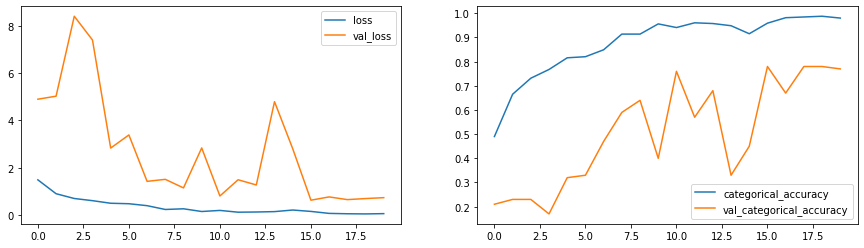

In [ ]:
plot(history_model1)

##### This Model is overfitting as can be seen from the orange line (Val_categorical_accuracy)

## Model 2  
### Using a dropout layer of 0.5 - Batch Size = 10 and No. of Epochs = 20

In [ ]:
#Adding dropout layers - Batch Size = 10 and No. of Epochs = 20
conv_3d2=ModelConv3D1()
conv_3d2.initialize_path(project_folder)
conv_3d2.initialize_image_properties(image_height=120,image_width=120)
conv_3d2.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
conv_3d2_model=conv_3d2.define_model(dense_neurons=256,dropout=0.5)
conv_3d2_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_36 (Conv3D)          (None, 16, 120, 120, 16)  1312      
                                                                 
 activation_36 (Activation)  (None, 16, 120, 120, 16)  0         
                                                                 
 batch_normalization_43 (Bat  (None, 16, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_36 (MaxPoolin  (None, 8, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_37 (Conv3D)          (None, 8, 60, 60, 32)     13856     
                                                                 
 activation_37 (Activation)  (None, 8, 60, 60, 32)    

In [ ]:
print("Total Params:", conv_3d2_model.count_params())
history_model2=conv_3d2.train_model(conv_3d2_model,augment_data=True)

Total Params: 1900997
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.5500 - categorical_accuracy: 0.4623
Epoch 1: val_loss improved from inf to 3.56029, saving model to model_init_2023-03-2013_15_18.823669/model-00001-1.55003-0.46229-3.56029-0.16000.h5
67/67 [==============================] - 211s 3s/step - loss: 1.5500 - categorical_accuracy: 0.4623 - val_loss: 3.5603 - val_categorical_accuracy: 0.1600 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 1.2417 - categorical_accuracy: 0.5490
Epoch 2: val_loss did not improve from 3.56029
67/67 [==============================] - 195s 3s/step - loss: 1.2417 - categorical_accuracy: 0.5490 - val_loss: 4.4313 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 1.1133 - categorical_accuracy: 0.5882
Epoch 3: val_loss did not improve from 3.56029
67/67 [==============================] - 218s 3s/step - loss: 1.1133 - categorical_a

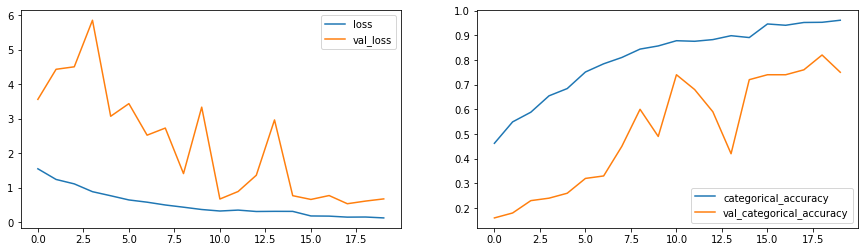

In [ ]:
#Plotting history model
plot(history_model2)

##### There is less overfitting but its still present.


## Model 3 
### Reducing the filter size from (3,3,3) to (2,2,2). Image resolution - 120 x  120, Batch Size = 10 and No. of Epochs = 20

In [ ]:
#Reducing the filter size to (2,2,2), Batch Size = 10 and No. of Epochs = 20

class ModelConv3D3(ModelBuilder):
    
    def define_model(self,filtersize=(2,2,2),dense_neurons=256,dropout=0.50):

        model = Sequential()
        model.add(Conv3D(16, filtersize, padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(128, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
        model.add(Dense(self.num_classes,activation='softmax'))
        
        optimiser = optimizers.Adam(lr=0.0002)
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
conv_3d3=ModelConv3D3()
conv_3d3.initialize_path(project_folder)
conv_3d3.initialize_image_properties(image_height=120,image_width=120)
conv_3d3.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
conv_3d3_model=conv_3d3.define_model(filtersize=(2,2,2),dense_neurons=256,dropout=0.5)
conv_3d3_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_40 (Conv3D)          (None, 16, 120, 120, 16)  400       
                                                                 
 activation_40 (Activation)  (None, 16, 120, 120, 16)  0         
                                                                 
 batch_normalization_48 (Bat  (None, 16, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_40 (MaxPoolin  (None, 8, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_41 (Conv3D)          (None, 8, 60, 60, 32)     4128      
                                                                 
 activation_41 (Activation)  (None, 8, 60, 60, 32)   

In [ ]:
print("Total Params:", conv_3d3_model.count_params())
history_model3=conv_3d3.train_model(conv_3d3_model,augment_data=True)

Total Params: 1695797
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.7365 - categorical_accuracy: 0.4359
Epoch 1: val_loss improved from inf to 4.11919, saving model to model_init_2023-03-2014_23_15.016313/model-00001-1.73650-0.43590-4.11919-0.21000.h5
67/67 [==============================] - 188s 3s/step - loss: 1.7365 - categorical_accuracy: 0.4359 - val_loss: 4.1192 - val_categorical_accuracy: 0.2100 - lr: 2.0000e-04
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.9352 - categorical_accuracy: 0.6591
Epoch 2: val_loss did not improve from 4.11919
67/67 [==============================] - 183s 3s/step - loss: 0.9352 - categorical_accuracy: 0.6591 - val_loss: 6.5085 - val_categorical_accuracy: 0.1800 - lr: 2.0000e-04
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.8597 - categorical_accuracy: 0.6923
Epoch 3: val_loss did not improve from 4.11919
67/67 [==============================] - 179s 3s/step - loss: 0.8597 - categ

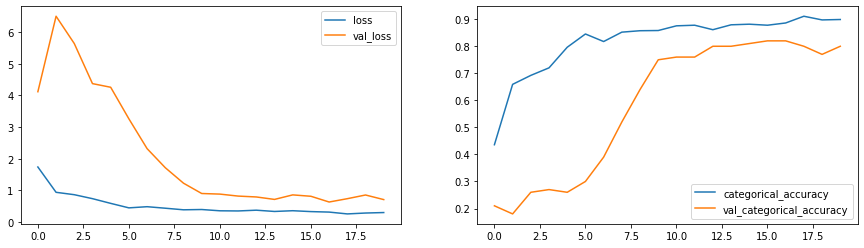

In [ ]:
#plot
plot(history_model3)

##### This Model has dreastically reduced overfitting and  has best validation accuracy of 82% and training accuracy of 91% . 

## Model 4 - 
### Increasing the dense layer to 512

In [23]:
# Batch Size = 10 and No. of Epochs = 20
class ModelConv3D4(ModelBuilder):
    
    def define_model(self,filtersize=(2,2,2),dense_neurons=512,dropout=0.50):

        model = Sequential()
        model.add(Conv3D(16, filtersize, padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(128, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
        model.add(Dense(self.num_classes,activation='softmax'))

        optimiser = optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [24]:
conv_3d4=ModelConv3D4()
conv_3d4.initialize_path(project_folder)
conv_3d4.initialize_image_properties(image_height=120,image_width=120)
conv_3d4.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
conv_3d4_model=conv_3d4.define_model(filtersize=(2,2,2),dense_neurons=512,dropout=0.5)
conv_3d4_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 16, 120, 120, 16)  400       
                                                                 
 activation (Activation)     (None, 16, 120, 120, 16)  0         
                                                                 
 batch_normalization (BatchN  (None, 16, 120, 120, 16)  64       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 8, 60, 60, 16)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 60, 60, 32)     4128      
                                                                 
 activation_1 (Activation)   (None, 8, 60, 60, 32)     0

In [25]:
print("Total Params:", conv_3d4_model.count_params())
history_model4=conv_3d4.train_model(conv_3d4_model,augment_data=True)

Total Params: 3303989
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.5906 - categorical_accuracy: 0.4842
Epoch 1: val_loss improved from inf to 10.25024, saving model to model_init_2023-03-2114_02_10.345408/model-00001-1.59063-0.48416-10.25024-0.21000.h5
67/67 [==============================] - 238s 3s/step - loss: 1.5906 - categorical_accuracy: 0.4842 - val_loss: 10.2502 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.9475 - categorical_accuracy: 0.6493
Epoch 2: val_loss did not improve from 10.25024
67/67 [==============================] - 223s 3s/step - loss: 0.9475 - categorical_accuracy: 0.6493 - val_loss: 12.3421 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.7282 - categorical_accuracy: 0.7217
Epoch 3: val_loss did not improve from 10.25024
67/67 [==============================] - 223s 3s/step - loss: 0.7282 - categor

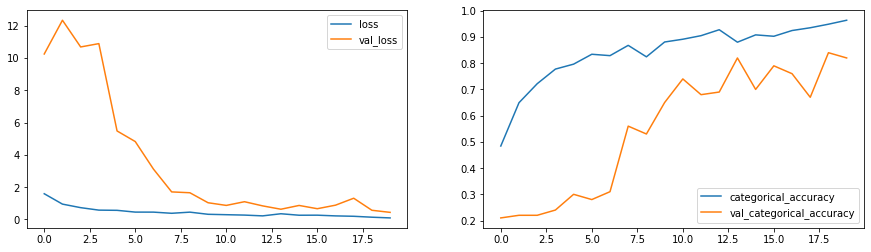

In [26]:
plot(history_model4)

##### The dense layer of 512 has improved the model.

### Removing individual Con3D layer to check if it is redundant.

## Model 5 
### Removed Con3D 32 layer. Frames_ to_sample = 10, batch_size = 8, Image resolution is 100 * 100 



In [ ]:
#Adding dropout at convolution layers
class ModelConv3D5(ModelBuilder):
    
    def define_model(self,filtersize=(2,2,2),dense_neurons=512,dropout=0.50):

        model = Sequential()
        model.add(Conv3D(16, filtersize, padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(128, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
        model.add(Dense(self.num_classes,activation='softmax'))

        optimiser = optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
conv_3d5=ModelConv3D5()
conv_3d5.initialize_path(project_folder)
conv_3d5.initialize_image_properties(image_height=100,image_width=100)
conv_3d5.initialize_hyperparams(frames_to_sample=10,batch_size=8,num_epochs=20)
conv_3d5_model=conv_3d5.define_model(filtersize=(2,2,2),dense_neurons=512,dropout=0.50)
conv_3d5_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_48 (Conv3D)          (None, 10, 100, 100, 16)  400       
                                                                 
 activation_48 (Activation)  (None, 10, 100, 100, 16)  0         
                                                                 
 batch_normalization_58 (Bat  (None, 10, 100, 100, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_48 (MaxPoolin  (None, 5, 50, 50, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_49 (Conv3D)          (None, 5, 50, 50, 64)     8256      
                                                                 
 activation_49 (Activation)  (None, 5, 50, 50, 64)   

In [ ]:
print("Total Params:", conv_3d5_model.count_params())
history_model5=conv_3d5.train_model(conv_3d5_model,augment_data=True)

Total Params: 9517461
Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 1.6520 - categorical_accuracy: 0.4781
Epoch 1: val_loss improved from inf to 24.25595, saving model to model_init_2023-03-2016_45_39.453201/model-00001-1.65197-0.47813-24.25595-0.21000.h5
83/83 [==============================] - 111s 1s/step - loss: 1.6520 - categorical_accuracy: 0.4781 - val_loss: 24.2560 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 1.0446 - categorical_accuracy: 0.6237
Epoch 2: val_loss did not improve from 24.25595
83/83 [==============================] - 102s 1s/step - loss: 1.0446 - categorical_accuracy: 0.6237 - val_loss: 35.7137 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 0.7403 - categorical_accuracy: 0.7179
Epoch 3: val_loss improved from 24.25595 to 14.43791, saving model to model_init_2023-03-2016_45_39.453201/model-00003-0.74027

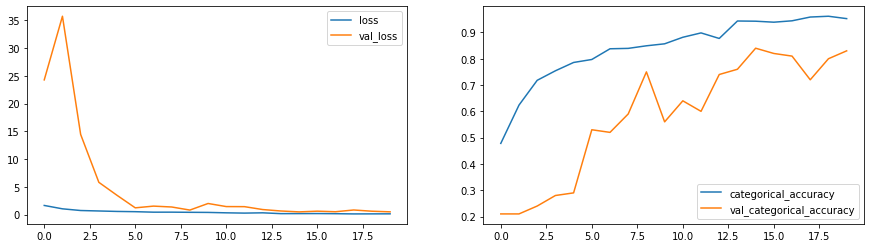

In [ ]:
plot(history_model5)

The model is clearly not going a bad job. The highest training accuracy is 96% and the highest val accuracy is 84%. 

##### All the experimental models above have more than 1 million parameters. Let's try to reduce the model size and see the performance

## Model 6 
### Reducing batch size to 8, frame_to_sample to 10 and removed Con3D 128 layer.

In [ ]:
class ModelConv3D6(ModelBuilder):
    
    def define_model(self,dense_neurons=512,dropout=0.50):

        model = Sequential()
        model.add(Conv3D(16, (2, 2, 2), padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, (2, 2, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, (2, 2, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
        model.add(Dense(self.num_classes,activation='softmax'))

        optimiser = optimizers.Adam(lr=0.0002)
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
conv_3d6=ModelConv3D6()
conv_3d6.initialize_path(project_folder)
conv_3d6.initialize_image_properties(image_height=120,image_width=120)
conv_3d6.initialize_hyperparams(frames_to_sample=10,batch_size=8,num_epochs=20)
conv_3d6_model=conv_3d6.define_model(dense_neurons=512,dropout=0.50)
conv_3d6_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_51 (Conv3D)          (None, 10, 120, 120, 16)  400       
                                                                 
 activation_51 (Activation)  (None, 10, 120, 120, 16)  0         
                                                                 
 batch_normalization_62 (Bat  (None, 10, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_51 (MaxPoolin  (None, 5, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_52 (Conv3D)          (None, 5, 60, 60, 32)     4128      
                                                                 
 activation_52 (Activation)  (None, 5, 60, 60, 32)   

In [ ]:
print("Total Params:", conv_3d6_model.count_params())
history_model6=conv_3d6.train_model(conv_3d6_model,augment_data=True)

Total Params: 7399349
Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 1.7285 - categorical_accuracy: 0.4615
Epoch 1: val_loss improved from inf to 8.99080, saving model to model_init_2023-03-2017_23_34.776398/model-00001-1.72854-0.46154-8.99080-0.21000.h5
83/83 [==============================] - 115s 1s/step - loss: 1.7285 - categorical_accuracy: 0.4615 - val_loss: 8.9908 - val_categorical_accuracy: 0.2100 - lr: 2.0000e-04
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 0.9689 - categorical_accuracy: 0.6546
Epoch 2: val_loss did not improve from 8.99080
83/83 [==============================] - 110s 1s/step - loss: 0.9689 - categorical_accuracy: 0.6546 - val_loss: 16.5332 - val_categorical_accuracy: 0.2200 - lr: 2.0000e-04
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 0.7704 - categorical_accuracy: 0.7051
Epoch 3: val_loss did not improve from 8.99080
83/83 [==============================] - 112s 1s/step - loss: 0.7704 - cate

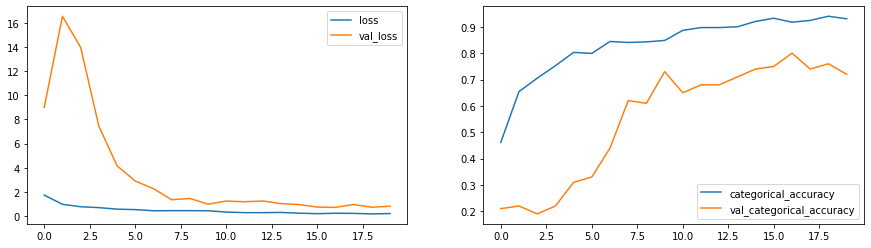

In [ ]:
plot(history_model6)

###### The highest training categorical accuracy 94% and the val_categorical accuracy is 80%

## Model 7 - Removed Con3D 64 layer

In [18]:
class ModelConv3D7(ModelBuilder):
    
    def define_model(self,dense_neurons=512,dropout=0.25):

        model = Sequential()
        model.add(Conv3D(16, (2, 2, 2), padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, (3, 3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(128, (2, 2, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(self.num_classes,activation='softmax'))

        optimiser = optimizers.Adam(lr=0.0002)
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [19]:
conv_3d7=ModelConv3D7()
conv_3d7.initialize_path(project_folder)
conv_3d7.initialize_image_properties(image_height=120,image_width=120)
conv_3d7.initialize_hyperparams(frames_to_sample=10,batch_size=8,num_epochs=20)
conv_3d7_model=conv_3d7.define_model(dense_neurons=512,dropout=0.50)
conv_3d7_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 10, 120, 120, 16)  400       
                                                                 
 activation (Activation)     (None, 10, 120, 120, 16)  0         
                                                                 
 batch_normalization (BatchN  (None, 10, 120, 120, 16)  64       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 5, 60, 60, 16)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 5, 60, 60, 32)     13856     
                                                                 
 activation_1 (Activation)   (None, 5, 60, 60, 32)     0

In [20]:
print("Total Params:", conv_3d7_model.count_params())
history_model7=conv_3d7.train_model(conv_3d7_model,augment_data=True)

Total Params: 14798581
Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 1.6947 - categorical_accuracy: 0.4827
Epoch 1: val_loss improved from inf to 11.23153, saving model to model_init_2023-03-2108_04_51.186203/model-00001-1.69474-0.48265-11.23153-0.21000.h5
83/83 [==============================] - 131s 1s/step - loss: 1.6947 - categorical_accuracy: 0.4827 - val_loss: 11.2315 - val_categorical_accuracy: 0.2100 - lr: 2.0000e-04
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 0.8125 - categorical_accuracy: 0.7066
Epoch 2: val_loss did not improve from 11.23153
83/83 [==============================] - 116s 1s/step - loss: 0.8125 - categorical_accuracy: 0.7066 - val_loss: 21.1274 - val_categorical_accuracy: 0.2100 - lr: 2.0000e-04
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 0.7208 - categorical_accuracy: 0.7534
Epoch 3: val_loss did not improve from 11.23153
83/83 [==============================] - 118s 1s/step - loss: 0.7208 

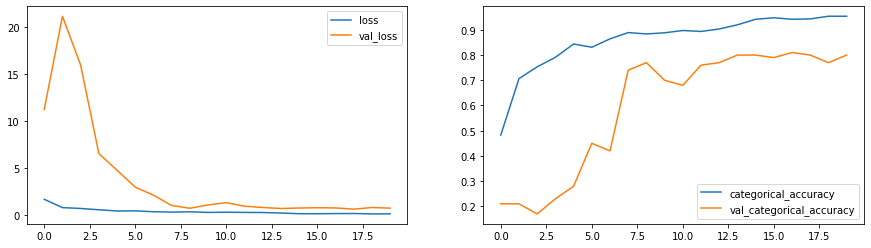

In [21]:
plot(history_model7)

###### All the layers in the model are vital and do help increase the performance

## Model 8 - CNN- LSTM Model

#### Using LSTM cells of 128 and dense_nerons of 256

In [ ]:
class RNNCNN1(ModelBuilder):
    
    def define_model(self,lstm_cells=128,dense_neurons=256,dropout=0.50):

        model = Sequential()

        model.add(TimeDistributed(Conv2D(16, (2, 2) , padding='same', activation='relu'),
                                  input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        
        model.add(TimeDistributed(Conv2D(32, (2, 2) , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        
        model.add(TimeDistributed(Conv2D(64, (2, 2) , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        
        model.add(TimeDistributed(Conv2D(128, (2, 2) , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))

        model.add(TimeDistributed(Flatten()))


        model.add(LSTM(lstm_cells))
        model.add(Dropout(dropout))
        
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
        
        model.add(Dense(self.num_classes, activation='softmax'))
        optimiser = optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
rnn_cnn1=RNNCNN1()
rnn_cnn1.initialize_path(project_folder)
rnn_cnn1.initialize_image_properties(image_height=120,image_width=120)
rnn_cnn1.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
rnn_cnn1_model=rnn_cnn1.define_model(lstm_cells=128,dense_neurons=128,dropout=0.50)
rnn_cnn1_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 16, 120, 120, 16)  208      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 16, 120, 120, 16)  64       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 16, 60, 60, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 16, 60, 60, 32)   2080      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 16, 60, 60, 32) 

In [ ]:
print("Total Params:", rnn_cnn1_model.count_params())
history_model8=rnn_cnn1.train_model(rnn_cnn1_model,augment_data=True)

Total Params: 3338869
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.6090 - categorical_accuracy: 0.2783
Epoch 1: val_loss improved from inf to 1.73917, saving model to model_init_2023-03-2018_07_51.399378/model-00001-1.60897-0.27828-1.73917-0.23000.h5
67/67 [==============================] - 203s 3s/step - loss: 1.6090 - categorical_accuracy: 0.2783 - val_loss: 1.7392 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 1.4169 - categorical_accuracy: 0.3816
Epoch 2: val_loss did not improve from 1.73917
67/67 [==============================] - 188s 3s/step - loss: 1.4169 - categorical_accuracy: 0.3816 - val_loss: 1.7945 - val_categorical_accuracy: 0.2400 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 1.2524 - categorical_accuracy: 0.4593
Epoch 3: val_loss improved from 1.73917 to 1.62848, saving model to model_init_2023-03-2018_07_51.399378/model-00003-1.25243-0.4592

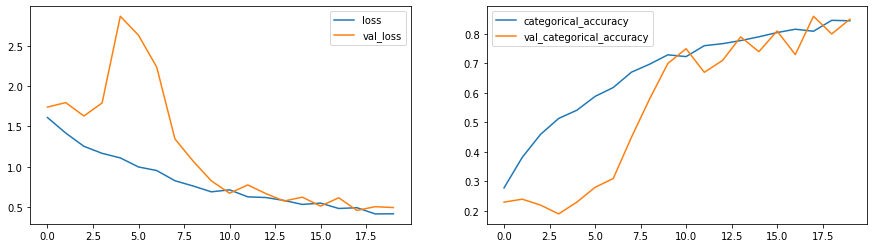

In [ ]:
plot(history_model8)

##### For CNN - LSTM model we get a best validation accuracy of 86%

Augmenting the data with ***slight rotation*** and running it on the similar set of models.

## Testing out the data augmentation on the model performance.

In [ ]:
# Code to build Model Builder with Augmentation
class ModelBuilderMoreAugmentation(metaclass= abc.ABCMeta):
    
    def initialize_path(self,project_folder):
        self.train_doc = np.random.permutation(open(project_folder + '/' + 'train.csv').readlines())
        self.val_doc = np.random.permutation(open(project_folder + '/' + 'val.csv').readlines())
        self.train_path = project_folder + '/' + 'train'
        self.val_path =  project_folder + '/' + 'val'
        self.num_train_sequences = len(self.train_doc)
        self.num_val_sequences = len(self.val_doc)
        
    def initialize_image_properties(self,image_height=100,image_width=100):
        self.image_height=image_height
        self.image_width=image_width
        self.channels=3
        self.num_classes=5
        self.total_frames=30
          
    def initialize_hyperparams(self,frames_to_sample=30,batch_size=10,num_epochs=20):
        self.frames_to_sample=frames_to_sample
        self.batch_size=batch_size
        self.num_epochs=num_epochs
        
        
    def generator(self,source_path, folder_list, augment=False):
        img_idx = np.round(np.linspace(0,self.total_frames-1,self.frames_to_sample)).astype(int)
        batch_size=self.batch_size
        while True:
            t = np.random.permutation(folder_list)
            num_batches = len(t)//batch_size
        
            for batch in range(num_batches): 
                batch_data, batch_labels= self.one_batch_data(source_path,t,batch,batch_size,img_idx,augment)
                yield batch_data, batch_labels 

            remaining_seq=len(t)%batch_size
        
            if (remaining_seq != 0):
                batch_data, batch_labels= self.one_batch_data(source_path,t,num_batches,batch_size,img_idx,augment,remaining_seq)
                yield batch_data, batch_labels 
    
    
    def one_batch_data(self,source_path,t,batch,batch_size,img_idx,augment,remaining_seq=0):
    
        seq_len = remaining_seq if remaining_seq else batch_size
    
        batch_data = np.zeros((seq_len,len(img_idx),self.image_height,self.image_width,self.channels)) 
        batch_labels = np.zeros((seq_len,self.num_classes)) 
    
        if (augment): batch_data_aug = np.zeros((seq_len,len(img_idx),self.image_height,self.image_width,self.channels))

        
        for folder in range(seq_len): 
            imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) 
            for idx,item in enumerate(img_idx): 
                image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                image_resized=resize(image,(self.image_height,self.image_width,3))
            

                batch_data[folder,idx,:,:,0] = (image_resized[:,:,0])/255
                batch_data[folder,idx,:,:,1] = (image_resized[:,:,1])/255
                batch_data[folder,idx,:,:,2] = (image_resized[:,:,2])/255
            
                if (augment):
                    shifted = cv2.warpAffine(image, 
                                             np.float32([[1, 0, np.random.randint(-30,30)],[0, 1, np.random.randint(-30,30)]]), 
                                            (image.shape[1], image.shape[0]))
                    
                    gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)

                    x0, y0 = np.argwhere(gray > 0).min(axis=0)
                    x1, y1 = np.argwhere(gray > 0).max(axis=0) 
                    
                    cropped=shifted[x0:x1,y0:y1,:]
                    
                    image_resized=resize(cropped,(self.image_height,self.image_width,3))
                    
                    M = cv2.getRotationMatrix2D((self.image_width//2,self.image_height//2),
                                                np.random.randint(-10,10), 1.0)
                    rotated = cv2.warpAffine(image_resized, M, (self.image_width, self.image_height))
                    
                    #shifted = cv2.warpAffine(image_resized, 
                    #                        np.float32([[1, 0, np.random.randint(-3,3)],[0, 1, np.random.randint(-3,3)]]), 
                    #                        (image_resized.shape[1], image_resized.shape[0]))
            
                    batch_data_aug[folder,idx,:,:,0] = (rotated[:,:,0])/255
                    batch_data_aug[folder,idx,:,:,1] = (rotated[:,:,1])/255
                    batch_data_aug[folder,idx,:,:,2] = (rotated[:,:,2])/255
                
            
            batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            
    
        if (augment):
            batch_data=np.concatenate([batch_data,batch_data_aug])
            batch_labels=np.concatenate([batch_labels,batch_labels])

        
        return(batch_data,batch_labels)
    
    
    def train_model(self, model, augment_data=False):
        train_generator = self.generator(self.train_path, self.train_doc,augment=augment_data)
        val_generator = self.generator(self.val_path, self.val_doc)

        model_name = 'model_init' + '_' + str(datetime.datetime.now()).replace(' ','').replace(':','_') + '/'
    
        if not os.path.exists(model_name):
            os.mkdir(model_name)
        
        filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
        LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=4)
        callbacks_list = [checkpoint, LR]

        if (self.num_train_sequences%self.batch_size) == 0:
            steps_per_epoch = int(self.num_train_sequences/self.batch_size)
        else:
            steps_per_epoch = (self.num_train_sequences//self.batch_size) + 1

        if (self.num_val_sequences%self.batch_size) == 0:
            validation_steps = int(self.num_val_sequences/self.batch_size)
        else:
            validation_steps = (self.num_val_sequences//self.batch_size) + 1
    
        history=model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=self.num_epochs, verbose=1, 
                            callbacks=callbacks_list, validation_data=val_generator, 
                            validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)
        return history

        
    @abc.abstractmethod
    def define_model(self):
        pass
    
    

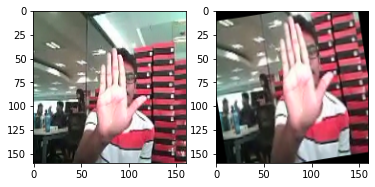

In [ ]:
# Testing out the Model Builder
class Test(ModelBuilderMoreAugmentation):
    def define_model(self):
        pass

test_generator=Test()
test_generator.initialize_path(project_folder)
test_generator.initialize_image_properties(image_height=160,image_width=160)
test_generator.initialize_hyperparams(frames_to_sample=30,batch_size=3,num_epochs=1)

g=test_generator.generator(test_generator.val_path,test_generator.val_doc,augment=True)
batch_data, batch_labels=next(g)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(batch_data[0,29,:,:,:])   
axes[1].imshow(batch_data[3,29,:,:,:])   

## Model 9 with Augmentation
### Dense layer 128, filter size (3,3,3), Frame_to_sample = 16, batch_size = 8

In [ ]:
class ModelConv3D9(ModelBuilderMoreAugmentation):
    
    def define_model(self,filtersize=(3,3,3),dense_neurons=128,dropout=0.50):

        model = Sequential()
        model.add(Conv3D(16, filtersize, padding='same',
                 input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(128, filtersize, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(self.num_classes,activation='softmax'))

        optimiser = optimizers.Adam(lr=0.0002)
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
conv_3d9=ModelConv3D9()
conv_3d9.initialize_path(project_folder)
conv_3d9.initialize_image_properties(image_height=120,image_width=120)
conv_3d9.initialize_hyperparams(frames_to_sample=16,batch_size=8,num_epochs=20)
conv_3d9_model=conv_3d9.define_model(dense_neurons=128,dropout=0.5)
conv_3d9_model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_62 (Conv3D)          (None, 16, 120, 120, 16)  1312      
                                                                 
 activation_62 (Activation)  (None, 16, 120, 120, 16)  0         
                                                                 
 batch_normalization_78 (Bat  (None, 16, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_62 (MaxPoolin  (None, 8, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_63 (Conv3D)          (None, 8, 60, 60, 32)     13856     
                                                                 
 activation_63 (Activation)  (None, 8, 60, 60, 32)   

In [ ]:
print("Total Params:", conv_3d9_model.count_params())
history_model9=conv_3d9.train_model(conv_3d9_model,augment_data=True)

Total Params: 1096901
Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 1.7417 - categorical_accuracy: 0.4231
Epoch 1: saving model to model_init_2023-03-2019_23_22.069340/model-00001-1.74166-0.42308-4.38867-0.21000.h5
83/83 [==============================] - 216s 3s/step - loss: 1.7417 - categorical_accuracy: 0.4231 - val_loss: 4.3887 - val_categorical_accuracy: 0.2100 - lr: 2.0000e-04
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 1.1230 - categorical_accuracy: 0.5701
Epoch 2: saving model to model_init_2023-03-2019_23_22.069340/model-00002-1.12302-0.57014-5.44952-0.24000.h5
83/83 [==============================] - 185s 2s/step - loss: 1.1230 - categorical_accuracy: 0.5701 - val_loss: 5.4495 - val_categorical_accuracy: 0.2400 - lr: 2.0000e-04
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 1.0216 - categorical_accuracy: 0.6109
Epoch 3: saving model to model_init_2023-03-2019_23_22.069340/model-00003-1.02161-0.61086-6.38249-0.

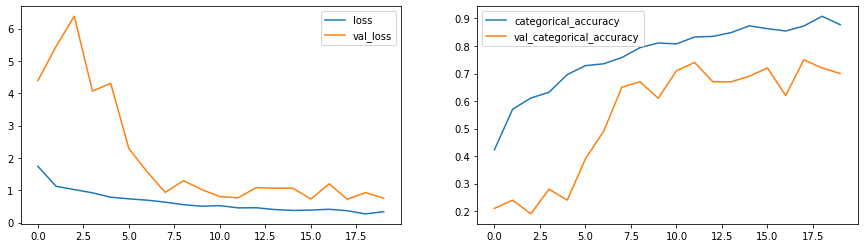

In [ ]:
plot(history_model9)

### The highest training accuracy is 90% wheras the highest val accuracy is 75%

## Data Augmentation makes the model overfit. Hence it is not useful in our case.

## Model 10 Using Transfer Learning Models


In [ ]:
# importing the MobileNet model due to it's lightweight architecture and high speed performance as compared  
# in the nimblebox.ai platform. 

from keras.applications import mobilenet

In [ ]:
mobilenet_transfer = mobilenet.MobileNet(weights='imagenet', include_top=False)

class RNNCNN_TL(ModelBuilderMoreAugmentation):
    
    def define_model(self,lstm_cells=128,dense_neurons=128,dropout=0.50):
        
        model = Sequential()
        model.add(TimeDistributed(mobilenet_transfer,input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
        
        
        for layer in model.layers:
            layer.trainable = False
        
        
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        model.add(TimeDistributed(Flatten()))

        model.add(LSTM(lstm_cells))
        model.add(Dropout(dropout))
        
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
        
        model.add(Dense(self.num_classes, activation='softmax'))
        
        
        optimiser = optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
rnn_cnn_tl=RNNCNN_TL()
rnn_cnn_tl.initialize_path(project_folder)
rnn_cnn_tl.initialize_image_properties(image_height=120,image_width=120)
rnn_cnn_tl.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
rnn_cnn_tl_model=rnn_cnn_tl.define_model(lstm_cells=128,dense_neurons=128,dropout=0.50)
rnn_cnn_tl_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeDi  (None, 16, 3, 3, 1024)   3228864   
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 16, 3, 3, 1024)   4096      
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 16, 1, 1, 1024)   0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 16, 1024)         0         
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 128)             

In [ ]:
print("Total Params:", rnn_cnn_tl_model.count_params())
history_model16=rnn_cnn_tl.train_model(rnn_cnn_tl_model,augment_data=True)

Total Params: 3840453
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.5616 - categorical_accuracy: 0.3183
Epoch 1: saving model to model_init_2023-03-2020_35_35.528399/model-00001-1.56162-0.31825-1.25059-0.50000.h5
67/67 [==============================] - 214s 3s/step - loss: 1.5616 - categorical_accuracy: 0.3183 - val_loss: 1.2506 - val_categorical_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 1.2347 - categorical_accuracy: 0.4940
Epoch 2: saving model to model_init_2023-03-2020_35_35.528399/model-00002-1.23473-0.49397-0.97254-0.64000.h5
67/67 [==============================] - 212s 3s/step - loss: 1.2347 - categorical_accuracy: 0.4940 - val_loss: 0.9725 - val_categorical_accuracy: 0.6400 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.9257 - categorical_accuracy: 0.6388
Epoch 3: saving model to model_init_2023-03-2020_35_35.528399/model-00003-0.92569-0.63876-0.73611-0.73000.h5

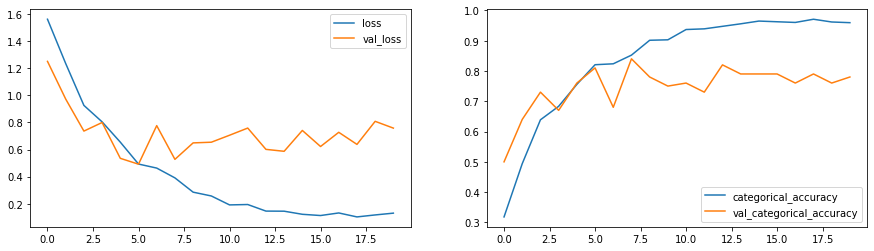

In [ ]:
plot(history_model16)

##### We are not training the mobilenet weights and we see validation accuracy is very poor. Let's train them as well and observe if there is performance improvement

## Model 11 Transfer Learning with GRU and training all weights


In [ ]:
from keras.applications import mobilenet

mobilenet_transfer = mobilenet.MobileNet(weights='imagenet', include_top=False)

class RNNCNN_TL2(ModelBuilderMoreAugmentation):
    
    def define_model(self,gru_cells=128,dense_neurons=128,dropout=0.25):
        
        model = Sequential()
        model.add(TimeDistributed(mobilenet_transfer,input_shape=(self.frames_to_sample,self.image_height,self.image_width,self.channels)))
 
        
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        model.add(TimeDistributed(Flatten()))

        model.add(GRU(gru_cells))
        model.add(Dropout(dropout))
        
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
        
        model.add(Dense(self.num_classes, activation='softmax'))
        
        
        optimiser = optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
rnn_cnn_tl2=RNNCNN_TL2()
rnn_cnn_tl2.initialize_path(project_folder)
rnn_cnn_tl2.initialize_image_properties(image_height=120,image_width=120)
rnn_cnn_tl2.initialize_hyperparams(frames_to_sample=16,batch_size=10,num_epochs=20)
rnn_cnn_tl2_model=rnn_cnn_tl2.define_model(gru_cells=128,dense_neurons=128,dropout=0.50)
rnn_cnn_tl2_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_17 (TimeDi  (None, 16, 3, 3, 1024)   3228864   
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 16, 3, 3, 1024)   4096      
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 16, 1, 1, 1024)   0         
 stributed)                                                      
                                                                 
 time_distributed_20 (TimeDi  (None, 16, 1024)         0         
 stributed)                                                      
                                                                 
 gru (GRU)                   (None, 128)             

In [ ]:
print("Total Params:", rnn_cnn_tl2_model.count_params())
history_model17=rnn_cnn_tl2.train_model(rnn_cnn_tl2_model,augment_data=True)

Total Params: 3693253
Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.6067 - categorical_accuracy: 0.3522
Epoch 1: saving model to model_init_2023-03-2021_48_36.974557/model-00001-1.60673-0.35219-1.41654-0.36000.h5
67/67 [==============================] - 200s 3s/step - loss: 1.6067 - categorical_accuracy: 0.3522 - val_loss: 1.4165 - val_categorical_accuracy: 0.3600 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 0.8477 - categorical_accuracy: 0.6712
Epoch 2: saving model to model_init_2023-03-2021_48_36.974557/model-00002-0.84769-0.67119-0.51342-0.82000.h5
67/67 [==============================] - 191s 3s/step - loss: 0.8477 - categorical_accuracy: 0.6712 - val_loss: 0.5134 - val_categorical_accuracy: 0.8200 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 0.6011 - categorical_accuracy: 0.7873
Epoch 3: saving model to model_init_2023-03-2021_48_36.974557/model-00003-0.60110-0.78733-0.34980-0.87000.h5

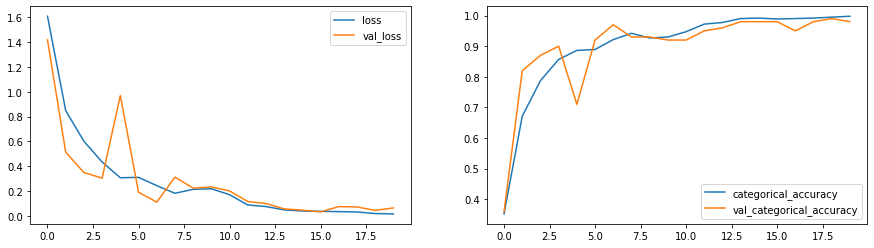

In [ ]:
plot(history_model17)

###Best results so far! 99% Training accuracy and 99% validation accuracy. 

# Consolidated Final Models

## The Conclusion: Model 4 Con3d is the best model because:

* Training Accuracy : 95%, Validation Accuracy : 91%
* Number of Parameters: 3,303,989 and is much less than model 11 which has the best performance but model 11 389,264 parameters more than model 4.

#Loading model and Testing

In [49]:
import time
from keras.models import load_model
model = load_model('model_init_2023-03-2114_02_10.345408/model-00014-0.35056-0.88009-0.63037-0.82000.h5')

In [ ]:
test_generator=conv_3d5()
test_generator.initialize_path(project_folder)
test_generator.initialize_image_properties(image_height=120,image_width=120)
test_generator.initialize_hyperparams(frames_to_sample=18,batch_size=20,num_epochs=20)

g=test_generator.generator(test_generator.val_path,test_generator.val_doc,augment=False)
batch_data, batch_labels=next(g)

In [ ]:
batch_labels

In [ ]:
print(np.argmax(model.predict(batch_data[:,:,:,:,:]),axis=1))